# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [1]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_sol import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
from datasets import load_dataset
import numpy as np

dataset = load_dataset("cifar100")

train_dataset = dataset['train']
test_dataset = dataset['test']

train_images = np.array([np.array(image) for image in train_dataset['img']])
train_labels = np.array(train_dataset['fine_label'])

test_images = np.array([np.array(image) for image in test_dataset['img']])
test_labels = np.array(test_dataset['fine_label'])

print('Train data (X) size: {}, and labels (Y) size: {}'.format(train_images.shape, train_labels.shape))
print('Test data (X) size: {}, and labels (Y) size: {}'.format(test_images.shape, test_labels.shape))

README.md:   0%|          | 0.00/9.98k [00:00<?, ?B/s]

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PC\.cache\huggingface\hub\datasets--cifar100. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/119M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Train data (X) size: (50000, 32, 32, 3), and labels (Y) size: (50000,)
Test data (X) size: (10000, 32, 32, 3), and labels (Y) size: (10000,)


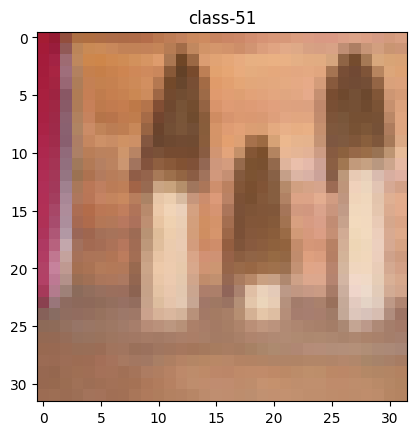

In [11]:

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

# TODO: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [12]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))                      

Val data (X) size: (5000, 32, 32, 3), and labels (Y) size: (5000,)
After reshape

Train data (X) size: (49900, 3072), and labels (Y) size: (49900,)
Val data (X) size: (5000, 3072), and labels (Y) size: (5000,)
Test data (X) size: (10000, 3072), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [14]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.583514: 100%|██████████| 250/250 [00:07<00:00, 31.67it/s]


epoch: 1 / (30), loss: 4.587855, train acc: 2.76, val acc: 2.56
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.524263: 100%|██████████| 250/250 [00:07<00:00, 33.44it/s]


epoch: 2 / (30), loss: 4.543894, train acc: 2.97, val acc: 3.14
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.523221: 100%|██████████| 250/250 [00:07<00:00, 33.87it/s]


epoch: 3 / (30), loss: 4.510011, train acc: 3.90, val acc: 3.98
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.505714: 100%|██████████| 250/250 [00:07<00:00, 32.98it/s]


epoch: 4 / (30), loss: 4.481678, train acc: 4.50, val acc: 4.58
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.423130: 100%|██████████| 250/250 [00:07<00:00, 33.11it/s]


epoch: 5 / (30), loss: 4.455948, train acc: 4.09, val acc: 4.46
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.410962: 100%|██████████| 250/250 [00:07<00:00, 32.66it/s]


epoch: 6 / (30), loss: 4.432945, train acc: 4.72, val acc: 4.54
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.396410: 100%|██████████| 250/250 [00:07<00:00, 33.42it/s]


epoch: 7 / (30), loss: 4.410507, train acc: 5.03, val acc: 5.00
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.436424: 100%|██████████| 250/250 [00:07<00:00, 34.71it/s]


epoch: 8 / (30), loss: 4.390450, train acc: 5.19, val acc: 5.10
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.446200: 100%|██████████| 250/250 [00:07<00:00, 31.56it/s]


epoch: 9 / (30), loss: 4.371776, train acc: 5.35, val acc: 5.26
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.364388: 100%|██████████| 250/250 [00:07<00:00, 33.44it/s]
c:\Users\PC\Downloads\Sol. of Exc-1-20240813\Sol. of Exc-1-20240813\first_nn_sol.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


epoch: 10 / (30), loss: 4.353280, train acc: 5.16, val acc: 5.04
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.259331: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 11 / (30), loss: 4.336846, train acc: 5.50, val acc: 5.28
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.328203: 100%|██████████| 250/250 [00:07<00:00, 33.27it/s]


epoch: 12 / (30), loss: 4.319302, train acc: 5.59, val acc: 5.08
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.276556: 100%|██████████| 250/250 [00:07<00:00, 32.22it/s]


epoch: 13 / (30), loss: 4.304312, train acc: 5.27, val acc: 5.32
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.234471: 100%|██████████| 250/250 [00:07<00:00, 32.62it/s]


epoch: 14 / (30), loss: 4.290282, train acc: 5.56, val acc: 5.58
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.280225: 100%|██████████| 250/250 [00:07<00:00, 33.41it/s]


epoch: 15 / (30), loss: 4.278153, train acc: 6.00, val acc: 5.66
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.300910: 100%|██████████| 250/250 [00:07<00:00, 33.07it/s]


epoch: 16 / (30), loss: 4.265580, train acc: 5.92, val acc: 6.08
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.262700: 100%|██████████| 250/250 [00:07<00:00, 32.73it/s]


epoch: 17 / (30), loss: 4.254621, train acc: 6.16, val acc: 6.16
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.260675: 100%|██████████| 250/250 [00:07<00:00, 34.36it/s]


epoch: 18 / (30), loss: 4.242825, train acc: 6.18, val acc: 6.00
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.247115: 100%|██████████| 250/250 [00:07<00:00, 34.95it/s]


epoch: 19 / (30), loss: 4.233141, train acc: 6.39, val acc: 6.10
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.217638: 100%|██████████| 250/250 [00:07<00:00, 33.43it/s]


epoch: 20 / (30), loss: 4.221310, train acc: 6.65, val acc: 6.64
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.197660: 100%|██████████| 250/250 [00:07<00:00, 34.53it/s]


epoch: 21 / (30), loss: 4.211505, train acc: 6.13, val acc: 6.32
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.235070: 100%|██████████| 250/250 [00:07<00:00, 32.30it/s]


epoch: 22 / (30), loss: 4.203703, train acc: 6.97, val acc: 6.54
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.127846: 100%|██████████| 250/250 [00:07<00:00, 35.24it/s]


epoch: 23 / (30), loss: 4.195271, train acc: 6.77, val acc: 6.56
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.178607: 100%|██████████| 250/250 [00:07<00:00, 35.48it/s]


epoch: 24 / (30), loss: 4.188066, train acc: 6.93, val acc: 6.62
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.100512: 100%|██████████| 250/250 [00:06<00:00, 36.15it/s]


epoch: 25 / (30), loss: 4.181771, train acc: 7.19, val acc: 6.92
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.173311: 100%|██████████| 250/250 [00:07<00:00, 35.40it/s]


epoch: 26 / (30), loss: 4.176882, train acc: 6.88, val acc: 6.78
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.156031: 100%|██████████| 250/250 [00:07<00:00, 34.90it/s]


epoch: 27 / (30), loss: 4.166311, train acc: 7.19, val acc: 7.22
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.077704: 100%|██████████| 250/250 [00:07<00:00, 34.41it/s]


epoch: 28 / (30), loss: 4.159431, train acc: 7.11, val acc: 6.74
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.186557: 100%|██████████| 250/250 [00:07<00:00, 34.48it/s]


epoch: 29 / (30), loss: 4.152497, train acc: 7.64, val acc: 7.50
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.089488: 100%|██████████| 250/250 [00:07<00:00, 32.60it/s]


epoch: 30 / (30), loss: 4.146370, train acc: 7.15, val acc: 7.14


In [15]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 7.64
Validation accuracy: 7.50
Test accuracy: 7.34


# Plot the loss.

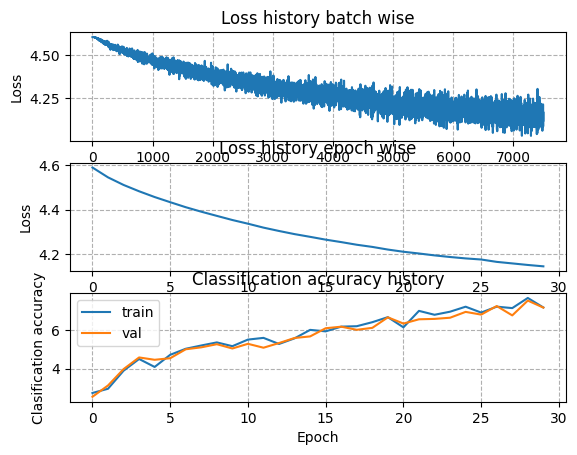

In [16]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [18]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 100
num_iters = 5000
num_epoch = 30
batch_size = 256
data_dimension = X_train.shape[1]

for nhn in num_hidden_nodes:
    for lr in learning_rates:
        
        net = FirstNN(data_dimension, nhn, num_classes)

        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val, 
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size, 
                          learning_rate=lr, 
                          verbose=False
                         )
            
        # Predict on the train set
        Y_train_pred = net.predict(X_train, best_param=True)
        train_acc = 100*(Y_train_pred == Y_train).mean()

        # Predict on the validation set
        Y_val_pred = net.predict(X_val, best_param=True)
        val_acc = 100*(Y_val_pred == Y_val).mean()

        results[(nhn, lr)] = (train_acc, val_acc)
        print('#hdnn: {}, lr: {} train accuracy: {:.2f} val accuracy: {:.2f}' .format(nhn, lr, train_acc, val_acc))
        if best_val < val_acc:
            best_val = val_acc
            best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

#hdnn: 30, lr: 0.001 train accuracy: 5.00 val accuracy: 5.10
#hdnn: 30, lr: 0.005 train accuracy: 5.58 val accuracy: 5.64
#hdnn: 30, lr: 0.007 train accuracy: 5.18 val accuracy: 5.18
#hdnn: 30, lr: 0.01 train accuracy: 6.02 val accuracy: 5.98
#hdnn: 30, lr: 0.05 train accuracy: 6.31 val accuracy: 6.68
#hdnn: 30, lr: 0.1 train accuracy: 2.88 val accuracy: 2.78
#hdnn: 50, lr: 0.001 train accuracy: 5.50 val accuracy: 5.54
#hdnn: 50, lr: 0.005 train accuracy: 6.52 val accuracy: 6.44
#hdnn: 50, lr: 0.007 train accuracy: 6.53 val accuracy: 6.58
#hdnn: 50, lr: 0.01 train accuracy: 7.20 val accuracy: 7.50
#hdnn: 50, lr: 0.05 train accuracy: 6.64 val accuracy: 6.72
#hdnn: 50, lr: 0.1 train accuracy: 5.46 val accuracy: 5.82
#hdnn: 60, lr: 0.001 train accuracy: 5.35 val accuracy: 5.48
#hdnn: 60, lr: 0.005 train accuracy: 6.48 val accuracy: 6.54
#hdnn: 60, lr: 0.007 train accuracy: 7.24 val accuracy: 7.28
#hdnn: 60, lr: 0.01 train accuracy: 7.43 val accuracy: 7.72
#hdnn: 60, lr: 0.05 train accurac

# Test on best model

In [19]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.49
Validation accuracy: 9.12
Test accuracy: 9.16


In [20]:
update_rule = 'gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='small_std'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.532324: 100%|██████████| 250/250 [00:08<00:00, 28.84it/s]


epoch: 1 / (30), loss: 4.573351, train acc: 2.82, val acc: 2.66
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.461945: 100%|██████████| 250/250 [00:08<00:00, 29.64it/s]


epoch: 2 / (30), loss: 4.498620, train acc: 3.56, val acc: 3.52
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.389359: 100%|██████████| 250/250 [00:08<00:00, 29.77it/s]


epoch: 3 / (30), loss: 4.441989, train acc: 4.56, val acc: 4.80
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.364389: 100%|██████████| 250/250 [00:08<00:00, 29.61it/s]


epoch: 4 / (30), loss: 4.396647, train acc: 5.24, val acc: 5.36
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.387562: 100%|██████████| 250/250 [00:08<00:00, 29.80it/s]


epoch: 5 / (30), loss: 4.357190, train acc: 5.73, val acc: 5.36
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.244732: 100%|██████████| 250/250 [00:08<00:00, 29.27it/s]


epoch: 6 / (30), loss: 4.323459, train acc: 5.83, val acc: 5.48
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.285818: 100%|██████████| 250/250 [00:08<00:00, 29.08it/s]


epoch: 7 / (30), loss: 4.291404, train acc: 5.80, val acc: 6.02
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.254704: 100%|██████████| 250/250 [00:08<00:00, 29.09it/s]


epoch: 8 / (30), loss: 4.264897, train acc: 6.17, val acc: 6.06
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.306638: 100%|██████████| 250/250 [00:08<00:00, 29.36it/s]


epoch: 9 / (30), loss: 4.240669, train acc: 6.04, val acc: 6.04
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.189914: 100%|██████████| 250/250 [00:08<00:00, 29.20it/s]


epoch: 10 / (30), loss: 4.220607, train acc: 6.12, val acc: 6.10
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.308016: 100%|██████████| 250/250 [00:08<00:00, 29.90it/s]


epoch: 11 / (30), loss: 4.200683, train acc: 6.88, val acc: 6.92
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.159703: 100%|██████████| 250/250 [00:08<00:00, 29.27it/s]


epoch: 12 / (30), loss: 4.184046, train acc: 7.03, val acc: 7.00
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.106971: 100%|██████████| 250/250 [00:08<00:00, 28.84it/s]


epoch: 13 / (30), loss: 4.166280, train acc: 7.23, val acc: 6.98
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.182565: 100%|██████████| 250/250 [00:08<00:00, 29.32it/s]


epoch: 14 / (30), loss: 4.152994, train acc: 7.36, val acc: 7.20
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.069552: 100%|██████████| 250/250 [00:08<00:00, 29.11it/s]


epoch: 15 / (30), loss: 4.140051, train acc: 7.18, val acc: 7.32
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.151723: 100%|██████████| 250/250 [00:08<00:00, 29.62it/s]


epoch: 16 / (30), loss: 4.125411, train acc: 7.54, val acc: 7.34
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.078917: 100%|██████████| 250/250 [00:08<00:00, 29.21it/s]


epoch: 17 / (30), loss: 4.113229, train acc: 7.96, val acc: 7.80
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.229821: 100%|██████████| 250/250 [00:08<00:00, 29.44it/s]


epoch: 18 / (30), loss: 4.106082, train acc: 8.18, val acc: 8.36
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.050487: 100%|██████████| 250/250 [00:08<00:00, 29.46it/s]


epoch: 19 / (30), loss: 4.092830, train acc: 8.33, val acc: 8.44
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.143273: 100%|██████████| 250/250 [00:08<00:00, 29.92it/s]


epoch: 20 / (30), loss: 4.084918, train acc: 8.23, val acc: 7.86
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.147724: 100%|██████████| 250/250 [00:08<00:00, 29.92it/s]


epoch: 21 / (30), loss: 4.073168, train acc: 8.28, val acc: 8.12
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.146675: 100%|██████████| 250/250 [00:08<00:00, 29.71it/s]


epoch: 22 / (30), loss: 4.065491, train acc: 8.56, val acc: 8.38
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.196912: 100%|██████████| 250/250 [00:08<00:00, 29.69it/s]


epoch: 23 / (30), loss: 4.053351, train acc: 9.21, val acc: 9.42
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.010088: 100%|██████████| 250/250 [00:08<00:00, 27.96it/s]


epoch: 24 / (30), loss: 4.043769, train acc: 9.04, val acc: 9.00
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.082544: 100%|██████████| 250/250 [00:08<00:00, 28.50it/s]


epoch: 25 / (30), loss: 4.035038, train acc: 9.68, val acc: 9.46
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.002199: 100%|██████████| 250/250 [00:08<00:00, 29.48it/s]


epoch: 26 / (30), loss: 4.028548, train acc: 9.38, val acc: 9.10
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.915878: 100%|██████████| 250/250 [00:08<00:00, 29.46it/s]


epoch: 27 / (30), loss: 4.018280, train acc: 9.77, val acc: 9.58
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.014186: 100%|██████████| 250/250 [00:08<00:00, 29.27it/s]


epoch: 28 / (30), loss: 4.010598, train acc: 9.58, val acc: 9.60
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.033602: 100%|██████████| 250/250 [00:08<00:00, 28.97it/s]


epoch: 29 / (30), loss: 4.005024, train acc: 9.77, val acc: 9.52
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.017429: 100%|██████████| 250/250 [00:08<00:00, 28.43it/s]


epoch: 30 / (30), loss: 3.999012, train acc: 10.00, val acc: 9.96


In [21]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 10.00
Validation accuracy: 9.96
Test accuracy: 10.05


In [22]:
update_rule = 'gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='Xavier'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.535579: 100%|██████████| 250/250 [00:08<00:00, 28.52it/s]


epoch: 1 / (30), loss: 4.571469, train acc: 2.90, val acc: 3.00
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.457104: 100%|██████████| 250/250 [00:08<00:00, 29.26it/s]


epoch: 2 / (30), loss: 4.487215, train acc: 4.06, val acc: 4.14
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.355939: 100%|██████████| 250/250 [00:08<00:00, 29.12it/s]


epoch: 3 / (30), loss: 4.423726, train acc: 4.60, val acc: 4.56
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.382027: 100%|██████████| 250/250 [00:08<00:00, 29.60it/s]


epoch: 4 / (30), loss: 4.374805, train acc: 4.83, val acc: 4.72
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.329928: 100%|██████████| 250/250 [00:08<00:00, 28.55it/s]


epoch: 5 / (30), loss: 4.333625, train acc: 5.55, val acc: 5.26
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.293633: 100%|██████████| 250/250 [00:08<00:00, 29.81it/s]


epoch: 6 / (30), loss: 4.300655, train acc: 6.00, val acc: 5.56
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.279357: 100%|██████████| 250/250 [00:08<00:00, 29.68it/s]


epoch: 7 / (30), loss: 4.272892, train acc: 6.00, val acc: 5.90
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.234779: 100%|██████████| 250/250 [00:08<00:00, 29.32it/s]


epoch: 8 / (30), loss: 4.247500, train acc: 6.19, val acc: 5.92
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.149176: 100%|██████████| 250/250 [00:08<00:00, 29.64it/s]


epoch: 9 / (30), loss: 4.226468, train acc: 6.43, val acc: 6.28
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.212600: 100%|██████████| 250/250 [00:08<00:00, 28.13it/s]


epoch: 10 / (30), loss: 4.206499, train acc: 6.59, val acc: 6.28
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.210010: 100%|██████████| 250/250 [00:08<00:00, 29.89it/s]


epoch: 11 / (30), loss: 4.186789, train acc: 6.74, val acc: 6.24
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.175773: 100%|██████████| 250/250 [00:08<00:00, 28.81it/s]


epoch: 12 / (30), loss: 4.172898, train acc: 6.89, val acc: 6.60
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.177738: 100%|██████████| 250/250 [00:08<00:00, 29.37it/s]


epoch: 13 / (30), loss: 4.158370, train acc: 6.79, val acc: 6.68
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.080732: 100%|██████████| 250/250 [00:08<00:00, 29.54it/s]


epoch: 14 / (30), loss: 4.144686, train acc: 7.44, val acc: 7.30
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.225719: 100%|██████████| 250/250 [00:08<00:00, 28.73it/s]


epoch: 15 / (30), loss: 4.132040, train acc: 7.52, val acc: 6.88
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.075182: 100%|██████████| 250/250 [00:08<00:00, 29.68it/s]


epoch: 16 / (30), loss: 4.120638, train acc: 7.75, val acc: 7.26
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.161319: 100%|██████████| 250/250 [00:08<00:00, 29.56it/s]


epoch: 17 / (30), loss: 4.112753, train acc: 7.56, val acc: 7.08
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.173326: 100%|██████████| 250/250 [00:08<00:00, 29.67it/s]


epoch: 18 / (30), loss: 4.099115, train acc: 8.13, val acc: 8.04
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.142855: 100%|██████████| 250/250 [00:08<00:00, 29.34it/s]


epoch: 19 / (30), loss: 4.088474, train acc: 7.84, val acc: 7.62
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.959180: 100%|██████████| 250/250 [00:08<00:00, 29.37it/s]


epoch: 20 / (30), loss: 4.077570, train acc: 8.30, val acc: 8.10
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.007589: 100%|██████████| 250/250 [00:08<00:00, 29.02it/s]


epoch: 21 / (30), loss: 4.073573, train acc: 8.47, val acc: 8.20
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.078719: 100%|██████████| 250/250 [00:08<00:00, 29.26it/s]


epoch: 22 / (30), loss: 4.062022, train acc: 8.87, val acc: 8.66
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.941677: 100%|██████████| 250/250 [00:08<00:00, 29.32it/s]


epoch: 23 / (30), loss: 4.055366, train acc: 9.01, val acc: 8.60
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.958063: 100%|██████████| 250/250 [00:08<00:00, 29.48it/s]


epoch: 24 / (30), loss: 4.043530, train acc: 8.82, val acc: 8.44
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.059367: 100%|██████████| 250/250 [00:08<00:00, 29.40it/s]


epoch: 25 / (30), loss: 4.039210, train acc: 9.04, val acc: 8.60
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.012005: 100%|██████████| 250/250 [00:08<00:00, 29.25it/s]


epoch: 26 / (30), loss: 4.027919, train acc: 9.40, val acc: 9.30
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.044145: 100%|██████████| 250/250 [00:08<00:00, 28.61it/s]


epoch: 27 / (30), loss: 4.022476, train acc: 9.56, val acc: 9.06
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.107923: 100%|██████████| 250/250 [00:08<00:00, 28.85it/s]


epoch: 28 / (30), loss: 4.012647, train acc: 9.58, val acc: 9.48
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.052603: 100%|██████████| 250/250 [00:08<00:00, 29.09it/s]


epoch: 29 / (30), loss: 4.005880, train acc: 9.78, val acc: 9.64
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.083260: 100%|██████████| 250/250 [00:08<00:00, 29.23it/s]


epoch: 30 / (30), loss: 4.001598, train acc: 9.89, val acc: 9.32


In [23]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.78
Validation accuracy: 9.64
Test accuracy: 9.55


In [24]:
update_rule = 'gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='nnid'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.547825: 100%|██████████| 250/250 [00:07<00:00, 33.60it/s]


epoch: 1 / (30), loss: 4.576191, train acc: 3.67, val acc: 3.58
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.498009: 100%|██████████| 250/250 [00:07<00:00, 34.32it/s]


epoch: 2 / (30), loss: 4.509174, train acc: 4.56, val acc: 4.62
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.436246: 100%|██████████| 250/250 [00:07<00:00, 34.16it/s]


epoch: 3 / (30), loss: 4.456078, train acc: 4.83, val acc: 4.56
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.341663: 100%|██████████| 250/250 [00:07<00:00, 34.00it/s]


epoch: 4 / (30), loss: 4.410621, train acc: 5.00, val acc: 5.04
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.327309: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 5 / (30), loss: 4.370801, train acc: 5.75, val acc: 5.56
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.371960: 100%|██████████| 250/250 [00:07<00:00, 34.47it/s]


epoch: 6 / (30), loss: 4.335381, train acc: 5.79, val acc: 5.60
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.305586: 100%|██████████| 250/250 [00:07<00:00, 34.53it/s]


epoch: 7 / (30), loss: 4.305319, train acc: 6.11, val acc: 5.56
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.245288: 100%|██████████| 250/250 [00:07<00:00, 34.44it/s]


epoch: 8 / (30), loss: 4.276975, train acc: 6.23, val acc: 6.18
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.193480: 100%|██████████| 250/250 [00:07<00:00, 33.94it/s]


epoch: 9 / (30), loss: 4.253005, train acc: 6.31, val acc: 5.86
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.229061: 100%|██████████| 250/250 [00:07<00:00, 34.14it/s]


epoch: 10 / (30), loss: 4.230256, train acc: 6.69, val acc: 6.32
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.152544: 100%|██████████| 250/250 [00:07<00:00, 34.36it/s]


epoch: 11 / (30), loss: 4.210377, train acc: 6.68, val acc: 6.32
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.164368: 100%|██████████| 250/250 [00:07<00:00, 34.01it/s]


epoch: 12 / (30), loss: 4.191621, train acc: 6.98, val acc: 6.60
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.167392: 100%|██████████| 250/250 [00:07<00:00, 34.49it/s]


epoch: 13 / (30), loss: 4.173850, train acc: 7.34, val acc: 7.04
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.047806: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 14 / (30), loss: 4.161452, train acc: 7.23, val acc: 7.00
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.159967: 100%|██████████| 250/250 [00:07<00:00, 35.06it/s]


epoch: 15 / (30), loss: 4.146490, train acc: 7.41, val acc: 7.44
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.215947: 100%|██████████| 250/250 [00:07<00:00, 34.24it/s]


epoch: 16 / (30), loss: 4.131977, train acc: 8.05, val acc: 7.84
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.203397: 100%|██████████| 250/250 [00:07<00:00, 34.99it/s]


epoch: 17 / (30), loss: 4.118082, train acc: 8.18, val acc: 7.84
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.140161: 100%|██████████| 250/250 [00:07<00:00, 34.18it/s]


epoch: 18 / (30), loss: 4.107983, train acc: 8.62, val acc: 8.40
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.138355: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 19 / (30), loss: 4.096970, train acc: 8.36, val acc: 8.10
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.115779: 100%|██████████| 250/250 [00:07<00:00, 33.55it/s]


epoch: 20 / (30), loss: 4.087656, train acc: 8.37, val acc: 8.56
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.083277: 100%|██████████| 250/250 [00:07<00:00, 34.63it/s]


epoch: 21 / (30), loss: 4.078289, train acc: 8.99, val acc: 8.86
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.043270: 100%|██████████| 250/250 [00:07<00:00, 34.20it/s]


epoch: 22 / (30), loss: 4.069398, train acc: 9.31, val acc: 9.42
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.054416: 100%|██████████| 250/250 [00:07<00:00, 34.05it/s]


epoch: 23 / (30), loss: 4.058602, train acc: 9.27, val acc: 8.70
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.081995: 100%|██████████| 250/250 [00:07<00:00, 34.30it/s]


epoch: 24 / (30), loss: 4.047972, train acc: 9.22, val acc: 9.04
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.002374: 100%|██████████| 250/250 [00:07<00:00, 34.58it/s]


epoch: 25 / (30), loss: 4.038815, train acc: 9.15, val acc: 9.00
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.030162: 100%|██████████| 250/250 [00:07<00:00, 34.26it/s]


epoch: 26 / (30), loss: 4.030119, train acc: 9.42, val acc: 9.46
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.102662: 100%|██████████| 250/250 [00:07<00:00, 34.08it/s]


epoch: 27 / (30), loss: 4.022871, train acc: 10.13, val acc: 9.98
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.074293: 100%|██████████| 250/250 [00:07<00:00, 34.22it/s]


epoch: 28 / (30), loss: 4.013507, train acc: 10.03, val acc: 10.22
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.906099: 100%|██████████| 250/250 [00:07<00:00, 33.95it/s]


epoch: 29 / (30), loss: 4.006348, train acc: 9.63, val acc: 9.04
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.949129: 100%|██████████| 250/250 [00:07<00:00, 34.27it/s]


epoch: 30 / (30), loss: 4.002090, train acc: 9.82, val acc: 9.60


In [25]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 10.03
Validation accuracy: 10.22
Test accuracy: 9.84


In [26]:
update_rule = 'm_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='small_std'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.530013: 100%|██████████| 250/250 [00:07<00:00, 33.91it/s]


epoch: 1 / (30), loss: 4.571237, train acc: 3.24, val acc: 3.42
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.477968: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 2 / (30), loss: 4.489311, train acc: 3.87, val acc: 3.90
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.391304: 100%|██████████| 250/250 [00:07<00:00, 33.93it/s]


epoch: 3 / (30), loss: 4.428820, train acc: 4.95, val acc: 4.94
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.377827: 100%|██████████| 250/250 [00:07<00:00, 34.78it/s]


epoch: 4 / (30), loss: 4.381988, train acc: 5.61, val acc: 5.60
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.334381: 100%|██████████| 250/250 [00:07<00:00, 33.85it/s]


epoch: 5 / (30), loss: 4.342213, train acc: 5.66, val acc: 5.58
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.313310: 100%|██████████| 250/250 [00:07<00:00, 34.44it/s]


epoch: 6 / (30), loss: 4.309025, train acc: 6.10, val acc: 5.96
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.334208: 100%|██████████| 250/250 [00:07<00:00, 34.47it/s]


epoch: 7 / (30), loss: 4.280616, train acc: 6.10, val acc: 5.82
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.337210: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 8 / (30), loss: 4.255011, train acc: 6.38, val acc: 6.38
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.248039: 100%|██████████| 250/250 [00:07<00:00, 34.57it/s]


epoch: 9 / (30), loss: 4.232117, train acc: 6.76, val acc: 6.40
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.067946: 100%|██████████| 250/250 [00:07<00:00, 33.63it/s]


epoch: 10 / (30), loss: 4.211573, train acc: 6.55, val acc: 6.02
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.168317: 100%|██████████| 250/250 [00:07<00:00, 33.78it/s]


epoch: 11 / (30), loss: 4.194258, train acc: 6.63, val acc: 6.44
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.185708: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 12 / (30), loss: 4.177582, train acc: 6.73, val acc: 6.40
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.258515: 100%|██████████| 250/250 [00:07<00:00, 34.46it/s]


epoch: 13 / (30), loss: 4.159526, train acc: 7.09, val acc: 6.58
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.045047: 100%|██████████| 250/250 [00:07<00:00, 34.82it/s]


epoch: 14 / (30), loss: 4.144973, train acc: 7.29, val acc: 6.54
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.092495: 100%|██████████| 250/250 [00:07<00:00, 34.46it/s]


epoch: 15 / (30), loss: 4.133316, train acc: 7.68, val acc: 7.30
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.098962: 100%|██████████| 250/250 [00:07<00:00, 34.57it/s]


epoch: 16 / (30), loss: 4.119515, train acc: 7.66, val acc: 7.06
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.235733: 100%|██████████| 250/250 [00:07<00:00, 34.41it/s]


epoch: 17 / (30), loss: 4.109382, train acc: 7.82, val acc: 7.82
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.023245: 100%|██████████| 250/250 [00:07<00:00, 34.43it/s]


epoch: 18 / (30), loss: 4.098181, train acc: 7.60, val acc: 7.14
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.118090: 100%|██████████| 250/250 [00:07<00:00, 34.52it/s]


epoch: 19 / (30), loss: 4.091089, train acc: 8.28, val acc: 8.18
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.100445: 100%|██████████| 250/250 [00:07<00:00, 33.10it/s]


epoch: 20 / (30), loss: 4.080171, train acc: 8.24, val acc: 8.10
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.090770: 100%|██████████| 250/250 [00:07<00:00, 33.68it/s]


epoch: 21 / (30), loss: 4.071687, train acc: 8.60, val acc: 8.76
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.978136: 100%|██████████| 250/250 [00:07<00:00, 34.54it/s]


epoch: 22 / (30), loss: 4.062133, train acc: 8.65, val acc: 8.66
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.027003: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 23 / (30), loss: 4.054995, train acc: 8.61, val acc: 8.28
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.021572: 100%|██████████| 250/250 [00:07<00:00, 34.11it/s]


epoch: 24 / (30), loss: 4.046744, train acc: 8.76, val acc: 8.36
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.979281: 100%|██████████| 250/250 [00:07<00:00, 34.67it/s]


epoch: 25 / (30), loss: 4.046037, train acc: 9.29, val acc: 9.18
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.039553: 100%|██████████| 250/250 [00:07<00:00, 33.82it/s]


epoch: 26 / (30), loss: 4.036995, train acc: 9.18, val acc: 8.80
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.126941: 100%|██████████| 250/250 [00:07<00:00, 33.96it/s]


epoch: 27 / (30), loss: 4.027505, train acc: 9.18, val acc: 9.02
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.917976: 100%|██████████| 250/250 [00:07<00:00, 33.99it/s]


epoch: 28 / (30), loss: 4.023177, train acc: 9.32, val acc: 8.66
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.168535: 100%|██████████| 250/250 [00:07<00:00, 34.18it/s]


epoch: 29 / (30), loss: 4.013109, train acc: 9.62, val acc: 9.90
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.042285: 100%|██████████| 250/250 [00:07<00:00, 34.71it/s]


epoch: 30 / (30), loss: 4.006840, train acc: 9.35, val acc: 9.42


In [27]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.62
Validation accuracy: 9.90
Test accuracy: 9.13


In [28]:
update_rule = 'm_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='Xavier'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.505376: 100%|██████████| 250/250 [00:07<00:00, 33.69it/s]


epoch: 1 / (30), loss: 4.568699, train acc: 2.28, val acc: 2.10
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.419784: 100%|██████████| 250/250 [00:07<00:00, 34.32it/s]


epoch: 2 / (30), loss: 4.482932, train acc: 2.47, val acc: 2.24
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.380832: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 3 / (30), loss: 4.425667, train acc: 4.37, val acc: 4.30
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.385040: 100%|██████████| 250/250 [00:07<00:00, 34.63it/s]


epoch: 4 / (30), loss: 4.383666, train acc: 4.86, val acc: 4.66
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.327396: 100%|██████████| 250/250 [00:07<00:00, 33.73it/s]


epoch: 5 / (30), loss: 4.348372, train acc: 4.76, val acc: 4.32
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.246808: 100%|██████████| 250/250 [00:07<00:00, 34.34it/s]


epoch: 6 / (30), loss: 4.318124, train acc: 5.30, val acc: 4.98
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.274755: 100%|██████████| 250/250 [00:07<00:00, 34.48it/s]


epoch: 7 / (30), loss: 4.290505, train acc: 6.28, val acc: 6.08
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.296519: 100%|██████████| 250/250 [00:07<00:00, 33.92it/s]


epoch: 8 / (30), loss: 4.265372, train acc: 6.04, val acc: 6.20
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.207489: 100%|██████████| 250/250 [00:07<00:00, 34.55it/s]


epoch: 9 / (30), loss: 4.242973, train acc: 6.65, val acc: 6.28
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.125286: 100%|██████████| 250/250 [00:07<00:00, 33.19it/s]


epoch: 10 / (30), loss: 4.224461, train acc: 6.49, val acc: 6.56
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.203030: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 11 / (30), loss: 4.206093, train acc: 6.92, val acc: 6.62
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.190342: 100%|██████████| 250/250 [00:07<00:00, 34.08it/s]


epoch: 12 / (30), loss: 4.189411, train acc: 6.85, val acc: 6.92
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.114122: 100%|██████████| 250/250 [00:07<00:00, 34.69it/s]


epoch: 13 / (30), loss: 4.175358, train acc: 6.91, val acc: 6.84
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.162842: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 14 / (30), loss: 4.160764, train acc: 7.05, val acc: 6.70
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.189679: 100%|██████████| 250/250 [00:07<00:00, 34.52it/s]


epoch: 15 / (30), loss: 4.147769, train acc: 6.97, val acc: 6.64
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.194631: 100%|██████████| 250/250 [00:07<00:00, 35.25it/s]


epoch: 16 / (30), loss: 4.134832, train acc: 7.28, val acc: 7.14
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.101593: 100%|██████████| 250/250 [00:07<00:00, 34.81it/s]


epoch: 17 / (30), loss: 4.125325, train acc: 7.21, val acc: 6.70
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.096018: 100%|██████████| 250/250 [00:07<00:00, 34.72it/s]


epoch: 18 / (30), loss: 4.116474, train acc: 7.68, val acc: 7.44
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.152687: 100%|██████████| 250/250 [00:07<00:00, 33.58it/s]


epoch: 19 / (30), loss: 4.109470, train acc: 7.80, val acc: 7.62
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.143396: 100%|██████████| 250/250 [00:07<00:00, 34.57it/s]


epoch: 20 / (30), loss: 4.099195, train acc: 7.86, val acc: 7.62
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.084429: 100%|██████████| 250/250 [00:07<00:00, 33.79it/s]


epoch: 21 / (30), loss: 4.086514, train acc: 7.92, val acc: 7.58
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.177191: 100%|██████████| 250/250 [00:07<00:00, 34.60it/s]


epoch: 22 / (30), loss: 4.078169, train acc: 8.56, val acc: 8.72
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.101597: 100%|██████████| 250/250 [00:07<00:00, 34.35it/s]


epoch: 23 / (30), loss: 4.070971, train acc: 8.21, val acc: 7.74
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.066665: 100%|██████████| 250/250 [00:07<00:00, 34.94it/s]


epoch: 24 / (30), loss: 4.061139, train acc: 8.38, val acc: 8.14
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.105458: 100%|██████████| 250/250 [00:07<00:00, 34.51it/s]


epoch: 25 / (30), loss: 4.051222, train acc: 8.86, val acc: 8.86
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.181983: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 26 / (30), loss: 4.047314, train acc: 8.91, val acc: 8.82
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.258604: 100%|██████████| 250/250 [00:07<00:00, 34.57it/s]


epoch: 27 / (30), loss: 4.035710, train acc: 9.01, val acc: 8.66
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.052740: 100%|██████████| 250/250 [00:07<00:00, 34.51it/s]


epoch: 28 / (30), loss: 4.029445, train acc: 9.14, val acc: 8.94
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.022389: 100%|██████████| 250/250 [00:07<00:00, 34.51it/s]


epoch: 29 / (30), loss: 4.022174, train acc: 9.16, val acc: 9.14
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.930105: 100%|██████████| 250/250 [00:07<00:00, 34.16it/s]


epoch: 30 / (30), loss: 4.016810, train acc: 9.22, val acc: 9.02


In [29]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.16
Validation accuracy: 9.14
Test accuracy: 8.99


In [30]:
update_rule = 'm_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='nnid'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.531594: 100%|██████████| 250/250 [00:07<00:00, 33.25it/s]


epoch: 1 / (30), loss: 4.570118, train acc: 2.81, val acc: 2.64
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.424194: 100%|██████████| 250/250 [00:07<00:00, 34.06it/s]


epoch: 2 / (30), loss: 4.482259, train acc: 3.73, val acc: 3.40
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.367184: 100%|██████████| 250/250 [00:07<00:00, 34.15it/s]


epoch: 3 / (30), loss: 4.418798, train acc: 4.72, val acc: 4.56
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.336257: 100%|██████████| 250/250 [00:07<00:00, 34.17it/s]


epoch: 4 / (30), loss: 4.369841, train acc: 5.17, val acc: 5.16
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.348731: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 5 / (30), loss: 4.331779, train acc: 5.10, val acc: 4.98
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.154651: 100%|██████████| 250/250 [00:07<00:00, 34.36it/s]


epoch: 6 / (30), loss: 4.299451, train acc: 5.77, val acc: 5.62
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.290690: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 7 / (30), loss: 4.271400, train acc: 5.81, val acc: 5.80
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.243206: 100%|██████████| 250/250 [00:07<00:00, 34.53it/s]


epoch: 8 / (30), loss: 4.247648, train acc: 6.29, val acc: 5.96
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.184602: 100%|██████████| 250/250 [00:07<00:00, 34.52it/s]


epoch: 9 / (30), loss: 4.226468, train acc: 6.45, val acc: 6.62
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.168494: 100%|██████████| 250/250 [00:07<00:00, 34.02it/s]


epoch: 10 / (30), loss: 4.207499, train acc: 6.12, val acc: 5.74
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.194631: 100%|██████████| 250/250 [00:07<00:00, 34.01it/s]


epoch: 11 / (30), loss: 4.190523, train acc: 6.45, val acc: 6.02
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.256467: 100%|██████████| 250/250 [00:07<00:00, 33.78it/s]


epoch: 12 / (30), loss: 4.175959, train acc: 6.76, val acc: 6.68
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.147636: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 13 / (30), loss: 4.160823, train acc: 7.05, val acc: 6.34
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.269857: 100%|██████████| 250/250 [00:07<00:00, 34.54it/s]


epoch: 14 / (30), loss: 4.145341, train acc: 7.58, val acc: 7.26
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.099656: 100%|██████████| 250/250 [00:07<00:00, 34.47it/s]


epoch: 15 / (30), loss: 4.131335, train acc: 7.78, val acc: 7.48
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.252428: 100%|██████████| 250/250 [00:07<00:00, 34.08it/s]


epoch: 16 / (30), loss: 4.123483, train acc: 7.57, val acc: 7.22
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.016817: 100%|██████████| 250/250 [00:07<00:00, 34.14it/s]


epoch: 17 / (30), loss: 4.111925, train acc: 7.28, val acc: 6.94
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.042559: 100%|██████████| 250/250 [00:07<00:00, 34.64it/s]


epoch: 18 / (30), loss: 4.103911, train acc: 7.69, val acc: 7.18
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.172875: 100%|██████████| 250/250 [00:07<00:00, 34.17it/s]


epoch: 19 / (30), loss: 4.094419, train acc: 7.75, val acc: 7.22
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.259504: 100%|██████████| 250/250 [00:07<00:00, 34.48it/s]


epoch: 20 / (30), loss: 4.085996, train acc: 7.72, val acc: 7.04
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.210847: 100%|██████████| 250/250 [00:07<00:00, 34.00it/s]


epoch: 21 / (30), loss: 4.074666, train acc: 7.90, val acc: 7.66
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.167443: 100%|██████████| 250/250 [00:07<00:00, 33.99it/s]


epoch: 22 / (30), loss: 4.065225, train acc: 8.63, val acc: 8.58
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.953336: 100%|██████████| 250/250 [00:07<00:00, 35.32it/s]


epoch: 23 / (30), loss: 4.058196, train acc: 8.76, val acc: 8.36
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.028993: 100%|██████████| 250/250 [00:07<00:00, 34.88it/s]


epoch: 24 / (30), loss: 4.051823, train acc: 8.41, val acc: 8.06
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.978223: 100%|██████████| 250/250 [00:07<00:00, 34.59it/s]


epoch: 25 / (30), loss: 4.044583, train acc: 9.58, val acc: 8.94
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.936041: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 26 / (30), loss: 4.040304, train acc: 8.89, val acc: 8.48
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.994841: 100%|██████████| 250/250 [00:07<00:00, 34.39it/s]


epoch: 27 / (30), loss: 4.032159, train acc: 9.51, val acc: 9.62
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.978291: 100%|██████████| 250/250 [00:07<00:00, 34.80it/s]


epoch: 28 / (30), loss: 4.026274, train acc: 9.35, val acc: 8.92
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.047731: 100%|██████████| 250/250 [00:07<00:00, 34.47it/s]


epoch: 29 / (30), loss: 4.016854, train acc: 9.59, val acc: 9.60
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.070206: 100%|██████████| 250/250 [00:07<00:00, 34.66it/s]


epoch: 30 / (30), loss: 4.009493, train acc: 9.70, val acc: 9.74


In [31]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.70
Validation accuracy: 9.74
Test accuracy: 9.39


In [32]:
update_rule = 'ns_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='small_std'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.539552: 100%|██████████| 250/250 [00:07<00:00, 33.94it/s]


epoch: 1 / (30), loss: 4.570264, train acc: 2.96, val acc: 2.72
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.456650: 100%|██████████| 250/250 [00:07<00:00, 34.80it/s]


epoch: 2 / (30), loss: 4.481466, train acc: 3.72, val acc: 3.60
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.360699: 100%|██████████| 250/250 [00:07<00:00, 34.76it/s]


epoch: 3 / (30), loss: 4.415833, train acc: 4.39, val acc: 4.36
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.347064: 100%|██████████| 250/250 [00:07<00:00, 34.80it/s]


epoch: 4 / (30), loss: 4.366962, train acc: 4.86, val acc: 4.82
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.284290: 100%|██████████| 250/250 [00:07<00:00, 34.08it/s]


epoch: 5 / (30), loss: 4.327374, train acc: 5.50, val acc: 5.34
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.274791: 100%|██████████| 250/250 [00:07<00:00, 35.08it/s]


epoch: 6 / (30), loss: 4.295520, train acc: 6.04, val acc: 5.72
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.149919: 100%|██████████| 250/250 [00:07<00:00, 34.40it/s]


epoch: 7 / (30), loss: 4.267595, train acc: 5.63, val acc: 5.48
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.222054: 100%|██████████| 250/250 [00:07<00:00, 34.55it/s]


epoch: 8 / (30), loss: 4.243273, train acc: 6.29, val acc: 5.74
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.259497: 100%|██████████| 250/250 [00:07<00:00, 34.65it/s]


epoch: 9 / (30), loss: 4.220551, train acc: 6.32, val acc: 6.14
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.171171: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 10 / (30), loss: 4.202327, train acc: 6.63, val acc: 6.66
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.062575: 100%|██████████| 250/250 [00:07<00:00, 34.82it/s]


epoch: 11 / (30), loss: 4.183616, train acc: 6.65, val acc: 6.34
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.228742: 100%|██████████| 250/250 [00:07<00:00, 34.33it/s]


epoch: 12 / (30), loss: 4.168857, train acc: 6.87, val acc: 6.70
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.172975: 100%|██████████| 250/250 [00:07<00:00, 34.23it/s]


epoch: 13 / (30), loss: 4.153078, train acc: 6.85, val acc: 6.02
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.108142: 100%|██████████| 250/250 [00:07<00:00, 35.16it/s]


epoch: 14 / (30), loss: 4.141099, train acc: 7.03, val acc: 6.98
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.103144: 100%|██████████| 250/250 [00:07<00:00, 34.44it/s]


epoch: 15 / (30), loss: 4.127647, train acc: 6.90, val acc: 6.28
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.182728: 100%|██████████| 250/250 [00:07<00:00, 34.87it/s]


epoch: 16 / (30), loss: 4.115964, train acc: 7.36, val acc: 7.06
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.038077: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 17 / (30), loss: 4.102858, train acc: 7.64, val acc: 7.28
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.130632: 100%|██████████| 250/250 [00:07<00:00, 34.80it/s]


epoch: 18 / (30), loss: 4.097221, train acc: 7.72, val acc: 7.68
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.154429: 100%|██████████| 250/250 [00:07<00:00, 34.60it/s]


epoch: 19 / (30), loss: 4.087315, train acc: 8.12, val acc: 7.86
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.014036: 100%|██████████| 250/250 [00:07<00:00, 34.53it/s]


epoch: 20 / (30), loss: 4.076527, train acc: 8.21, val acc: 7.82
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.123671: 100%|██████████| 250/250 [00:07<00:00, 34.65it/s]


epoch: 21 / (30), loss: 4.068031, train acc: 8.65, val acc: 8.62
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.112191: 100%|██████████| 250/250 [00:07<00:00, 33.23it/s]


epoch: 22 / (30), loss: 4.061367, train acc: 8.72, val acc: 8.56
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.106103: 100%|██████████| 250/250 [00:07<00:00, 33.86it/s]


epoch: 23 / (30), loss: 4.051358, train acc: 8.00, val acc: 8.14
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.995397: 100%|██████████| 250/250 [00:07<00:00, 34.56it/s]


epoch: 24 / (30), loss: 4.049346, train acc: 8.85, val acc: 8.76
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.125977: 100%|██████████| 250/250 [00:07<00:00, 34.15it/s]


epoch: 25 / (30), loss: 4.039350, train acc: 8.65, val acc: 8.46
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.973556: 100%|██████████| 250/250 [00:07<00:00, 34.29it/s]


epoch: 26 / (30), loss: 4.031032, train acc: 8.97, val acc: 8.84
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.949757: 100%|██████████| 250/250 [00:07<00:00, 34.77it/s]


epoch: 27 / (30), loss: 4.025989, train acc: 9.39, val acc: 9.30
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.002234: 100%|██████████| 250/250 [00:07<00:00, 35.02it/s]


epoch: 28 / (30), loss: 4.015246, train acc: 9.13, val acc: 8.98
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.056039: 100%|██████████| 250/250 [00:07<00:00, 34.76it/s]


epoch: 29 / (30), loss: 4.013885, train acc: 9.29, val acc: 8.72
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.944910: 100%|██████████| 250/250 [00:07<00:00, 34.76it/s]


epoch: 30 / (30), loss: 4.002689, train acc: 9.48, val acc: 9.42


In [33]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.48
Validation accuracy: 9.42
Test accuracy: 9.51


In [34]:
update_rule = 'ns_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='Xavier'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.543990: 100%|██████████| 250/250 [00:07<00:00, 33.12it/s]


epoch: 1 / (30), loss: 4.571353, train acc: 3.58, val acc: 3.48
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.455757: 100%|██████████| 250/250 [00:07<00:00, 34.84it/s]


epoch: 2 / (30), loss: 4.484067, train acc: 3.94, val acc: 4.00
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.440291: 100%|██████████| 250/250 [00:07<00:00, 34.54it/s]


epoch: 3 / (30), loss: 4.421797, train acc: 5.18, val acc: 4.98
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.321418: 100%|██████████| 250/250 [00:07<00:00, 34.68it/s]


epoch: 4 / (30), loss: 4.377145, train acc: 5.20, val acc: 5.06
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.290435: 100%|██████████| 250/250 [00:07<00:00, 31.27it/s]


epoch: 5 / (30), loss: 4.340350, train acc: 5.81, val acc: 5.68
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.267891: 100%|██████████| 250/250 [00:07<00:00, 33.87it/s]


epoch: 6 / (30), loss: 4.308736, train acc: 5.89, val acc: 6.02
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.303301: 100%|██████████| 250/250 [00:07<00:00, 34.64it/s]


epoch: 7 / (30), loss: 4.282605, train acc: 6.13, val acc: 6.24
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.206454: 100%|██████████| 250/250 [00:07<00:00, 34.46it/s]


epoch: 8 / (30), loss: 4.257577, train acc: 6.26, val acc: 6.12
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.208280: 100%|██████████| 250/250 [00:07<00:00, 34.62it/s]


epoch: 9 / (30), loss: 4.235198, train acc: 6.35, val acc: 6.14
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.222989: 100%|██████████| 250/250 [00:07<00:00, 34.65it/s]


epoch: 10 / (30), loss: 4.215710, train acc: 6.33, val acc: 6.30
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.154345: 100%|██████████| 250/250 [00:07<00:00, 34.71it/s]


epoch: 11 / (30), loss: 4.198602, train acc: 6.96, val acc: 6.66
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.174672: 100%|██████████| 250/250 [00:07<00:00, 32.88it/s]


epoch: 12 / (30), loss: 4.181672, train acc: 6.88, val acc: 6.90
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.196441: 100%|██████████| 250/250 [00:07<00:00, 34.29it/s]


epoch: 13 / (30), loss: 4.167568, train acc: 6.69, val acc: 6.40
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.122633: 100%|██████████| 250/250 [00:07<00:00, 34.67it/s]


epoch: 14 / (30), loss: 4.154620, train acc: 7.09, val acc: 6.96
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.077570: 100%|██████████| 250/250 [00:07<00:00, 34.76it/s]


epoch: 15 / (30), loss: 4.140375, train acc: 7.27, val acc: 7.08
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.099586: 100%|██████████| 250/250 [00:07<00:00, 34.71it/s]


epoch: 16 / (30), loss: 4.127888, train acc: 7.64, val acc: 7.48
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.085841: 100%|██████████| 250/250 [00:07<00:00, 34.41it/s]


epoch: 17 / (30), loss: 4.115123, train acc: 7.54, val acc: 7.46
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.034898: 100%|██████████| 250/250 [00:07<00:00, 35.12it/s]


epoch: 18 / (30), loss: 4.104996, train acc: 7.53, val acc: 7.06
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.151259: 100%|██████████| 250/250 [00:08<00:00, 30.19it/s]


epoch: 19 / (30), loss: 4.095946, train acc: 7.74, val acc: 7.94
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.108679: 100%|██████████| 250/250 [00:07<00:00, 34.05it/s]


epoch: 20 / (30), loss: 4.083640, train acc: 8.11, val acc: 7.68
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.138432: 100%|██████████| 250/250 [00:07<00:00, 33.79it/s]


epoch: 21 / (30), loss: 4.075812, train acc: 7.98, val acc: 7.74
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.155272: 100%|██████████| 250/250 [00:07<00:00, 34.59it/s]


epoch: 22 / (30), loss: 4.069559, train acc: 8.04, val acc: 7.68
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.049766: 100%|██████████| 250/250 [00:07<00:00, 33.85it/s]


epoch: 23 / (30), loss: 4.067441, train acc: 8.66, val acc: 8.24
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.165774: 100%|██████████| 250/250 [00:07<00:00, 34.46it/s]


epoch: 24 / (30), loss: 4.055053, train acc: 8.84, val acc: 8.52
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.026623: 100%|██████████| 250/250 [00:07<00:00, 33.91it/s]


epoch: 25 / (30), loss: 4.049764, train acc: 8.78, val acc: 8.56
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.111088: 100%|██████████| 250/250 [00:07<00:00, 34.28it/s]


epoch: 26 / (30), loss: 4.041072, train acc: 9.60, val acc: 9.34
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.007900: 100%|██████████| 250/250 [00:07<00:00, 34.18it/s]


epoch: 27 / (30), loss: 4.028061, train acc: 9.47, val acc: 9.10
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.007716: 100%|██████████| 250/250 [00:07<00:00, 34.54it/s]


epoch: 28 / (30), loss: 4.024537, train acc: 9.28, val acc: 8.74
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.136692: 100%|██████████| 250/250 [00:07<00:00, 34.31it/s]


epoch: 29 / (30), loss: 4.021216, train acc: 9.61, val acc: 9.70
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.973008: 100%|██████████| 250/250 [00:07<00:00, 34.44it/s]


epoch: 30 / (30), loss: 4.012897, train acc: 9.17, val acc: 8.72


In [35]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.61
Validation accuracy: 9.70
Test accuracy: 9.47


In [36]:
update_rule = 'ns_gd'
data_dimension = X_train.shape[1]
num_hidden_nodes = 100
num_classes = 100
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)
learning_rate=0.01
num_epoch=30
batch_size=200
param_init='nnid'  #small_std , #Xavier , #nnid
# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.501609: 100%|██████████| 250/250 [00:07<00:00, 34.05it/s]


epoch: 1 / (30), loss: 4.569676, train acc: 3.87, val acc: 4.02
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.430848: 100%|██████████| 250/250 [00:07<00:00, 33.74it/s]


epoch: 2 / (30), loss: 4.482431, train acc: 4.45, val acc: 4.40
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.448809: 100%|██████████| 250/250 [00:07<00:00, 34.45it/s]


epoch: 3 / (30), loss: 4.421417, train acc: 5.06, val acc: 4.78
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.394929: 100%|██████████| 250/250 [00:07<00:00, 34.69it/s]


epoch: 4 / (30), loss: 4.376047, train acc: 4.95, val acc: 4.86
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.265765: 100%|██████████| 250/250 [00:07<00:00, 34.58it/s]


epoch: 5 / (30), loss: 4.339750, train acc: 5.20, val acc: 4.84
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.310167: 100%|██████████| 250/250 [00:07<00:00, 34.36it/s]


epoch: 6 / (30), loss: 4.310094, train acc: 5.67, val acc: 5.34
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.189203: 100%|██████████| 250/250 [00:07<00:00, 34.45it/s]


epoch: 7 / (30), loss: 4.283235, train acc: 5.93, val acc: 5.80
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.203086: 100%|██████████| 250/250 [00:07<00:00, 34.47it/s]


epoch: 8 / (30), loss: 4.259938, train acc: 6.30, val acc: 6.04
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.325673: 100%|██████████| 250/250 [00:07<00:00, 34.53it/s]


epoch: 9 / (30), loss: 4.239271, train acc: 6.02, val acc: 5.80
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.215449: 100%|██████████| 250/250 [00:07<00:00, 34.86it/s]


epoch: 10 / (30), loss: 4.219910, train acc: 6.68, val acc: 6.20
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.251681: 100%|██████████| 250/250 [00:07<00:00, 34.86it/s]


epoch: 11 / (30), loss: 4.201561, train acc: 6.70, val acc: 6.76
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.275295: 100%|██████████| 250/250 [00:07<00:00, 35.08it/s]


epoch: 12 / (30), loss: 4.186373, train acc: 6.87, val acc: 7.14
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.123388: 100%|██████████| 250/250 [00:07<00:00, 34.46it/s]


epoch: 13 / (30), loss: 4.173774, train acc: 7.02, val acc: 6.80
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.159723: 100%|██████████| 250/250 [00:07<00:00, 34.52it/s]


epoch: 14 / (30), loss: 4.159476, train acc: 6.69, val acc: 6.80
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.185823: 100%|██████████| 250/250 [00:07<00:00, 34.75it/s]


epoch: 15 / (30), loss: 4.143138, train acc: 7.17, val acc: 7.34
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.059892: 100%|██████████| 250/250 [00:07<00:00, 34.68it/s]


epoch: 16 / (30), loss: 4.132923, train acc: 7.46, val acc: 6.90
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.026750: 100%|██████████| 250/250 [00:07<00:00, 35.07it/s]


epoch: 17 / (30), loss: 4.120130, train acc: 7.62, val acc: 7.62
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.109412: 100%|██████████| 250/250 [00:07<00:00, 34.86it/s]


epoch: 18 / (30), loss: 4.110169, train acc: 7.75, val acc: 7.66
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.174427: 100%|██████████| 250/250 [00:07<00:00, 34.31it/s]


epoch: 19 / (30), loss: 4.102215, train acc: 8.12, val acc: 7.64
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.017099: 100%|██████████| 250/250 [00:07<00:00, 34.95it/s]


epoch: 20 / (30), loss: 4.087365, train acc: 7.99, val acc: 7.80
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.139101: 100%|██████████| 250/250 [00:07<00:00, 33.42it/s]


epoch: 21 / (30), loss: 4.082918, train acc: 8.12, val acc: 7.86
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.086695: 100%|██████████| 250/250 [00:07<00:00, 34.63it/s]


epoch: 22 / (30), loss: 4.074728, train acc: 8.19, val acc: 7.92
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.135389: 100%|██████████| 250/250 [00:07<00:00, 33.51it/s]


epoch: 23 / (30), loss: 4.065945, train acc: 8.52, val acc: 8.68
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.056854: 100%|██████████| 250/250 [00:07<00:00, 35.40it/s]


epoch: 24 / (30), loss: 4.057730, train acc: 8.35, val acc: 8.22
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.116790: 100%|██████████| 250/250 [00:07<00:00, 35.33it/s]


epoch: 25 / (30), loss: 4.047804, train acc: 8.79, val acc: 8.26
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.930340: 100%|██████████| 250/250 [00:07<00:00, 34.86it/s]


epoch: 26 / (30), loss: 4.037634, train acc: 8.79, val acc: 8.62
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.077944: 100%|██████████| 250/250 [00:07<00:00, 34.77it/s]


epoch: 27 / (30), loss: 4.033648, train acc: 8.86, val acc: 8.62
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 3.989792: 100%|██████████| 250/250 [00:07<00:00, 33.83it/s]


epoch: 28 / (30), loss: 4.026187, train acc: 9.15, val acc: 8.82
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.097032: 100%|██████████| 250/250 [00:07<00:00, 34.40it/s]


epoch: 29 / (30), loss: 4.023510, train acc: 9.27, val acc: 9.28
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 249 / (250), loss: 4.145875: 100%|██████████| 250/250 [00:07<00:00, 34.59it/s]


epoch: 30 / (30), loss: 4.015986, train acc: 9.23, val acc: 8.84


In [37]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 9.27
Validation accuracy: 9.28
Test accuracy: 8.96
